In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import datetime

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
df = pd.read_csv("../datasets/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Part 1
## <i>Some dataset analysis and exploration</i>

### 1.1
<i>What amount of passengers were male and what amount of passangers were female?</i>

In [3]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Answer
Male - <u>577</u><br>
Female - <u>314</u> 

### 1.2
<i>How many passengers were able to survive?</i>

In [4]:
survived_series = df['Survived'].value_counts()
survived_series

0    549
1    342
Name: Survived, dtype: int64

From the description of the dataset we can see that:<br>
0 = Didn't survive<br>
1 = Survived

In [5]:
survival_rate = survived_series[1] / (survived_series[0] + survived_series[1])
survival_rate

0.38383838383838381

In [6]:
survival_percent = round(survival_rate*100, 2)
survival_percent

38.380000000000003

### Answer
There was a <u>38,38%</u> of survivors

### 1.3
<i>What was the ratio of the passengers from the first class to all passengers?</i>

In [7]:
pclass_series = df['Pclass'].value_counts()
pclass_series

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
first_class_rate = pclass_series[1] / (pclass_series[1] + pclass_series[2] + pclass_series[3])
first_class_rate

0.24242424242424243

In [9]:
first_class_percent = round(first_class_rate*100, 2)
first_class_percent

24.239999999999998

### Answer
There was a <u>24,24%</u> of passengers of the first class

### 1.4
<i>What was the average and median age of the passengers?</i>

In [10]:
age_series = df["Age"]
round(age_series.mean(), 2)

29.7

In [11]:
age_series.median()

28.0

### Answer
<u>29,7</u> - average age<br>
<u>28</u> - median age

### 1.5
<i>Is there a correlation between a number of brothers/sisters/spouse and a number of parents/children?<br> 
Count a Pearson's correlation between "SibSp" and "Parch" variables.</i>

<b>Link to the doc on corr() method in pandas:</b><br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html<br>

<b>Link to a theory description:</b><br>
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

<b>Some description about which correlation value is significant:</b><br>
http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/

Also you can read about Pearson's correlation in book <b>"ThinkStats2"</b> (free pdf book) in chapter <b>"7.5 Pearson's correlation"</b>.<br>
http://greenteapress.com/wp/think-stats-2e/

In [12]:
correlation_df = df[['SibSp', 'Parch']]
correlation_df.head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [13]:
correlation_df.corr(method='pearson')

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


### Answer
Correlation value - <u>0.414838</u><br><br>
It means that <u>when "SibSp" variable is high, the "Parch" variable is also tends to be high and vice versa</u>.<br><br>
The value 0.414838 says to us that <u>there is a correlation between these variables, but it's not very strong</u><br><br> 
<i>(it is common to say that there is a strong correlation between variables if the Pearson's correlation is between 0.5 and 1)</i>

### 1.6.
<i>What was the most popular female name on the ship?<br>
Extract from the full name of passengers (variable "Name") theirs personal names (variable "First Name")</i>

In [14]:
women_df = df[df['Sex'] == "female"]
women_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Let's see what womens' prefixes are there in the dataset.<br>
It will help us to make a rule by which we will extract personal names.

In [15]:
def get_prefix_set(name_str):
    name_list = name_str.split(" ")
    # Return only word with a dot
    for word in name_list: 
        if "." in word:
            return word

prefix_array = women_df["Name"].apply(get_prefix_set).unique()
prefix_array

array(['Mrs.', 'Miss.', 'Mme.', 'Ms.', 'Lady.', 'Mlle.', 'Countess.', 'Dr.'], dtype=object)

Let's now print some examples of every category of prefixes to formulate the rules

In [16]:
names_series = women_df["Name"]
for prefix in prefix_array:
    print("Prefix = {}".format(prefix))
    # regex=False for using strict search (using python "in" operator underneath)
    print(names_series[names_series.str.contains(prefix, regex=False)].head(3))
    print()

Prefix = Mrs.
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Name: Name, dtype: object

Prefix = Miss.
2              Heikkinen, Miss. Laina
10    Sandstrom, Miss. Marguerite Rut
11           Bonnell, Miss. Elizabeth
Name: Name, dtype: object

Prefix = Mme.
369    Aubart, Mme. Leontine Pauline
Name: Name, dtype: object

Prefix = Ms.
443    Reynaldo, Ms. Encarnacion
Name: Name, dtype: object

Prefix = Lady.
556    Duff Gordon, Lady. (Lucille Christiana Sutherl...
Name: Name, dtype: object

Prefix = Mlle.
641                                Sagesser, Mlle. Emma
710    Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
Name: Name, dtype: object

Prefix = Countess.
759    Rothes, the Countess. of (Lucy Noel Martha Dye...
Name: Name, dtype: object

Prefix = Dr.
796    Leader, Dr. Alice (Farnham)
Name: Name, dtype: object



#### Let's now formulate our rule based on examples for all prefixes:
- <b>Mme.</b> or <b>Miss.</b> or <b>Ms.</b> or <b>Mlle.</b> or <b>Dr.</b><br>
    <u>Rule</u>: take the first word after prefix
    
- <b>Mrs.</b> or <b>Lady.</b> or <b>Countess.</b><br>
    <u>Rule</u>: if there are brackets, take the first word in brackets, overwise take the first word after prefix<br>

In [17]:
def get_first_name(name_str, prefix_array):
    name_list = name_str.split(" ")
    
    for prefix in prefix_array:
        if prefix in name_list:
            if(prefix == "Mme." or prefix == "Miss." or 
               prefix == "Ms." or prefix == "Mlle." or prefix == "Dr."):
                return name_list[name_list.index(prefix) + 1]
            elif prefix == "Mrs." or prefix == "Lady." or prefix == "Countess.":
                if name_str.find("(") != -1:
                    name = name_str[name_str.index("(")+1:]
                    if name.find(" ") != -1:
                        name = name[:name.index(" ")]
                    else:
                        name = name[:name.index(")")]
                    return name
                else:
                    return name_list[name_list.index(prefix) + 1]

names_list = women_df["Name"].apply(get_first_name, args=(prefix_array,)).tolist()
names_list[:10] # show 10 elements

['Florence',
 'Laina',
 'Lily',
 'Elisabeth',
 'Adele',
 'Marguerite',
 'Elizabeth',
 'Hulda',
 'Mary',
 'Emelia']

In [18]:
Counter(names_list).most_common(10)

[('Anna', 15),
 ('Mary', 14),
 ('Elizabeth', 11),
 ('Margaret', 10),
 ('Alice', 7),
 ('Bertha', 5),
 ('Maria', 5),
 ('Helen', 5),
 ('Florence', 4),
 ('Ellen', 4)]

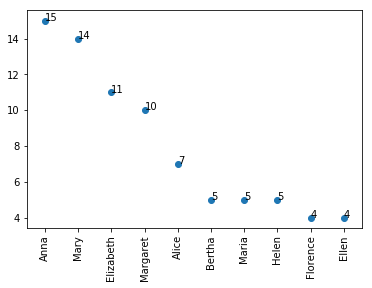

In [19]:
N_NAMES = 10

top = Counter(names_list).most_common(N_NAMES)
top_names = [i[0] for i in top]
top_values = [i[1] for i in top]

plt.xticks(range(N_NAMES), top_names, rotation='vertical')
plt.scatter(range(N_NAMES), top_values)
for i in range(N_NAMES):
    plt.annotate(top_values[i], xy=(i,top_values[i]))
plt.show()

### Answer
<b>Anna</b> was the most popular name on the ship<br>
<i>(of course if we assume Mary and Marie as different names :) )</i>

# Part 2.
## Features extraction and basic DecisionTreeСlassifier

### 2.1
<i>There are a missing values in data - for example, for certain passengers age is missing.<br>
Drop all samples which contain nan values in any of these variables - 'Pclass', 'Fare', 'Age', 'Sex'
</i>

In [20]:
df.dropna(inplace=True, subset=['Pclass', 'Fare', 'Age', 'Sex'])

### 2.2
<i>Leave in dataset only 4 variables:<br> 
- a passenger's class (Pclass)
- price of a ticket (Fare)
- a passenger's age (Age)
- a passenger's sex (Sex) 
</i>

In [21]:
df2 = df[['Pclass', 'Fare', 'Age', 'Sex']].copy()
df2.head()

,Pclass,Fare,Age,Sex
0,3,7.2500,22.0,male
1,1,71.2833,38.0,female
2,3,7.9250,26.0,female
3,1,53.1000,35.0,female
4,3,8.0500,35.0,male


### 2.3
<i>Convert "Sex" variable from string to integer type</i>

In [22]:
df2['Sex'] = np.where(df2['Sex'] == 'male', 1, 0)
df2.head()

,Pclass,Fare,Age,Sex
0,3,7.2500,22.0,1
1,1,71.2833,38.0,0
2,3,7.9250,26.0,0
3,1,53.1000,35.0,0
4,3,8.0500,35.0,1


### 2.4
<i>Select the target variable — "Survived"</i>

In [23]:
target_variable = df['Survived']
target_variable.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### 2.5 
<i>Let's for example teach a basic decision tree with random_state=241 and all other arguments as default<i>

<b>Link to "Understanding the decision tree structure":</b><br>
http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html<br>
<b>"Desition tree" in Scikit Learn docs</b><br>
http://scikit-learn.org/stable/modules/tree.html

In [24]:
estimator = DecisionTreeClassifier(random_state=241)
estimator.fit(df2, target_variable)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')

In [25]:
accuracy_score(target_variable, estimator.predict(df2))

0.98459383753501406

<b>Accuracy</b> of our model is <u>98%</u> which is very high.<br>
But it's important to understand that we performed testing of our model only on training data.<br> This score doen't tell us how our model works on a new data.<br>
<br>
Moreover, there is a high risk that our model is <b>overfitted</b> (or <b>overlearned</b>) which means that it corresponds too closely or exactly to our initial dataset.<br>
<br>
In the next part we will:
- <b>split our training set</b> into separate test and training datasets  
- perform <b>feature selection</b>, which will help us to reduce amount of variables by which we will train our model
- perform <b>cross validation</b>,  which will help us to more accurately count accuracy of trained model

# Part 3
## Applying machine learning

### 3.1
<i>Find two most important features in dataset.</i>

This task is called <b>feature selection</b>.<br>
Documentation on <b>SelectKBest</b>:<br>
http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [26]:
print("Initial df2 shape: {}".format(df2.shape))
print("df2: \n{}".format(df2.head(10)))

# Create and fit selector
selector = SelectKBest(k=2)
selector.fit(df2, target_variable)

# Get ids of columns to keep
ids_selected = selector.get_support(indices=True)

# Create new dataframe with only desired columns, or overwrite existing
df2_reduced = df2.iloc[:,ids_selected]

print("New df2 shape: " + str(df2_reduced.shape))
df2_reduced.head()

Initial df2 shape: (714, 4)
df2: 
    Pclass     Fare   Age  Sex
0        3   7.2500  22.0    1
1        1  71.2833  38.0    0
2        3   7.9250  26.0    0
3        1  53.1000  35.0    0
4        3   8.0500  35.0    1
6        1  51.8625  54.0    1
7        3  21.0750   2.0    1
8        3  11.1333  27.0    0
9        2  30.0708  14.0    0
10       3  16.7000   4.0    0
New df2 shape: (714, 2)


,Pclass,Sex
0,3,1
1,1,0
2,3,0
3,1,0
4,3,1


In [27]:
df2_reduced.columns

Index(['Pclass', 'Sex'], dtype='object')

### Answer
<b>'Pclass' и 'Sex'</b> - two most important features based on method <b>SelectKBest</b> and statistics test <b>k-classif</b>

### 3.2
<i>Train a model using two main features which predicts, will a person survive a Titanic sinking or not.</i>

First we will <b>divide</b> our reduced dataframe df2_reduced (dataframe with only 2 main features) <b>into test and train datasets</b> in proportion, for example 70-30%.

Also let's make an <b>explicit random_state = 241</b> for sake of definite reproduction of results. 

In [28]:
my_rand_state = 241

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df2_reduced, target_variable, 
                                                    test_size=0.3, random_state=my_rand_state)

Let's train <b>DecisionTreeClassifier</b> with random_state=241 once again, but this time using reduced dataset and testing its accuracy on testing dataset (which wasn't used in training).

In [30]:
estimator = DecisionTreeClassifier(random_state=my_rand_state)
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')

In [31]:
accuracy_score(y_test, estimator.predict(X_test))

0.8046511627906977

<u>80,4%</u> - not a perfect result, but it's more representative than 98%, which we got using training data as a test data. 

### 3.3
<i>Train a model using «KNearestNeighbors» and «LogisticRegression»

<b>Scikit-learn KNearestNeighbors:</b><br>
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html<br>
<b>KNearestNeighbors in details:</b><br>
http://scikit-learn.org/stable/modules/neighbors.html<br>
<b>Scikit-learn LogisticRegression:</b><br>
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

<b>KNearestNeighbours</b> with amount of neighbors = 5

In [32]:
# Educate
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

# Predict
y_pred = neigh.predict(X_test)

# Print report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.81      0.86      0.84       133
          1       0.75      0.67      0.71        82

avg / total       0.79      0.79      0.79       215

[[115  18]
 [ 27  55]]


0.79069767441860461

<b>LogisticRegression</b> with default parameters (L2 as a penalty; liblinear as a solver because it is recommended for small datasets)

In [33]:
# Educate
regr = LogisticRegression()
regr.fit(X_train, y_train)

# Predict
y_pred = regr.predict(X_test)

# Print report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.81      0.83      0.82       133
          1       0.71      0.70      0.70        82

avg / total       0.78      0.78      0.78       215

[[110  23]
 [ 25  57]]


0.77674418604651163

### 3.4
Check the accuracy of models with <b>cross validation</b>.<br>

In [34]:
scores_neigh = cross_val_score(neigh, df2_reduced, target_variable, cv=5)
print("Cross-validated scores for each step: \n{}".format(scores_neigh))

Cross-validated scores for each step: 
[ 0.78321678  0.81118881  0.77622378  0.82517483  0.79577465]


In [35]:
scores_regr = cross_val_score(regr, df2_reduced, target_variable, cv=5)
print("Cross-validated scores for each step: \n{}".format(scores_regr))

Cross-validated scores for each step: 
[ 0.78321678  0.81818182  0.77622378  0.72727273  0.79577465]


### 3.5
<i>Compare accuracy of «KNearestNeighbors» and «LogisticRegression» in percents.</i>

<b>«KNearestNeighbors» accuracy</b>

In [36]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_neigh.mean(), scores_neigh.std() * 2))

Accuracy: 0.80 (+/- 0.04)


<b>«LogisticRegression» accuracy</b>

In [37]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_regr.mean(), scores_regr.std() * 2))

Accuracy: 0.78 (+/- 0.06)


### Answer
<b>«KNearestNeighbors» with amount of neighbors = 5</b> gives a 2% more accuracy using k=5 cross validation than a <b>«LogisticRegression»</b>.

# Part 4
## Making predictions on test dataset (for a Kaggle competition)

### 4.1 
<i>Read test data, for which we will make predictions</i>

In [38]:
df_test = pd.read_csv("../datasets/titanic_test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 4.2
<i>Do some dataset preparation that we already did for the train data
- Leave only two most important features in dataset (according to SelectKBest, that we did in step 3.1)
- Drop every line that contains NaN in those two features (if there are any)
- Convert "Sex" from strings to integers
</i>

In [39]:
df_test.dropna(inplace=True, subset=['Pclass', 'Sex'])

df2_test = df_test[['Pclass', 'Sex']].copy()

df2_test['Sex'] = np.where(df2_test['Sex'] == 'male', 1, 0)
df2_test.head()

,Pclass,Sex
0,3,1
1,3,0
2,2,1
3,3,1
4,3,0


### 4.3
<i>Educate ML algorithms for classification:
- without explicitly stating a "random_state"
- on the whole train data</i>

In [40]:
# LogisticRegression
regr = LogisticRegression()
regr.fit(df2_reduced, target_variable)

# KNeighbors
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(df2_reduced, target_variable)

# DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(df2_reduced, target_variable)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### 4.4
<i>Cross-validation to understand best performing algorithm</i>

In [41]:
scores_regr = cross_val_score(regr, df2_reduced, target_variable, cv=10)
scores_neigh = cross_val_score(neigh, df2_reduced, target_variable, cv=10)
scores_tree = cross_val_score(tree, df2_reduced, target_variable, cv=10)

print("Accuracy LogisticRegression: %0.2f (+/- %0.2f)" % (scores_regr.mean(), scores_regr.std() * 2))
print("Accuracy KNeighborsClassifier: %0.2f (+/- %0.2f)" % (scores_neigh.mean(), scores_neigh.std() * 2))
print("Accuracy DecisionTreeClassifier: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))

Accuracy LogisticRegression: 0.78 (+/- 0.08)
Accuracy KNeighborsClassifier: 0.76 (+/- 0.09)
Accuracy DecisionTreeClassifier: 0.79 (+/- 0.08)


### 4.5
<i>Make predictions with DecisionTreeClassifier because it was the most accurate method on train data based on cross-validation</i>

In [42]:
y_pred = tree.predict(df2_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

### 4.6
<i>Form a dataset and write it to a file</i>

In [43]:
d = {'Survived': y_pred}
df_to_submit = pd.DataFrame(data=d, index=df_test["PassengerId"])
df_to_submit.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [44]:
now_dt = datetime.datetime.now().strftime("%d:%m:%Y")
df_to_submit.to_csv("subm_decision_tree_{}.csv".format(now_dt))

#### Make predictions based on another algorithms

In [45]:
y_pred = neigh.predict(df2_test)
d = {'Survived': y_pred}
df_to_submit = pd.DataFrame(data=d, index=df_test["PassengerId"])
df_to_submit.head()
now_dt = datetime.datetime.now().strftime("%d:%m:%Y")
df_to_submit.to_csv("subm_neigh_{}.csv".format(now_dt))

y_pred = regr.predict(df2_test)
d = {'Survived': y_pred}
df_to_submit = pd.DataFrame(data=d, index=df_test["PassengerId"])
df_to_submit.head()
now_dt = datetime.datetime.now().strftime("%d:%m:%Y")
df_to_submit.to_csv("subm_regr_{}.csv".format(now_dt))

# Scores on Kaggle:
<b>0.76555</b> - LogisticRegression<br>
<b>0.75598</b> - DecisionTreeClassifier<br>
<b>0.70813</b> - KNeighborsClassifier(n_neighbors=5)